In [68]:
# Initialize Otter
import otter
grader = otter.Notebook("lab_ass02_2024.ipynb")

# Computer Assignment 2

***
**Task 1**:  Solution to difference equations
***

Consider a system governed by the following difference equation:
$$y[n] + 0.9y[n-2] = 0.3x[n] + 0.6x[n-1] + 0.3x[n-2].$$
Assuming that the system is causal, find and plot its impulse response.

Note that the impulse response is the signal $h[n]$ at the output when the input is $x[n] = \delta[n]$, so
$$h[n] + 0.9h[n-2] = 0.3\delta[n] + 0.6\delta[n-1] + 0.3\delta[n-2].$$
Additionally, if causal then we know that $h[n]=0$ for $n<0$.  Thus
\begin{align}
  h[0] &= 0.3\delta[0] + 0.6\delta[-1] + 0.3\delta[-2] - 0.9h[-2] = 0.3 \\
  h[1] &= 0.3\delta[1] + 0.6\delta[0] + 0.3\delta[-1] - 0.9h[-1] = 0.6 \\
  h[2] &= 0.3\delta[2] + 0.6\delta[1] + 0.3\delta[0] - 0.9h[0] = 0.3 - 0.9(0.3) = 0.03
\end{align}
and subsequently for $n \geq 3$ we have
$$h[n] = -0.9h[n-2]$$.

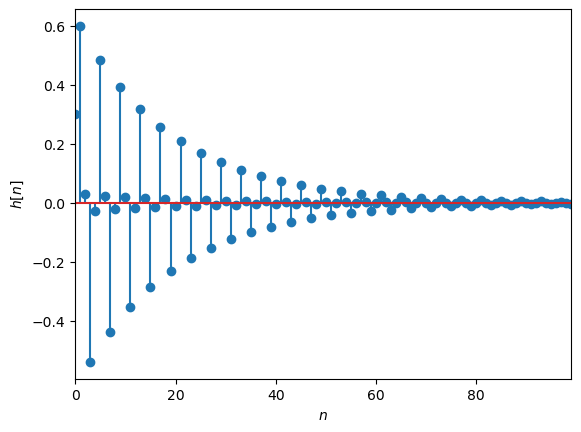

In [69]:
import numpy as np
import matplotlib.pyplot as plt

n1v = np.arange(0,100)
h1v = np.zeros(n1v.shape)
h1v[0] = 0.3
h1v[1] = 0.6
h1v[2] = 0.03
# Put code below that implements the rest of the iteration
for n in np.arange(3,100):
    h1v[n]=-0.9*h1v[n-2]

# Stem plot with labels
plt.stem(n1v, h1v)
plt.xlabel('$n$')
plt.ylabel('$h[n]$')

# Make axes a bit prettier
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)

In [70]:
grader.check("lab_ass02_q1a")

lab_ass02_q1a results: All test cases passed!
lab_ass02_q1a - 1 message: h1v[1] and h1v[2] have correct values

***
**Task 2**:  Causal filtering from difference equation
***

Consider again the difference equation
$$y[n] + 0.9y[n-2] = 0.3x[n] + 0.6x[n-1] + 0.3x[n-2].$$
This can be specified by two vectors of coefficients
\begin{align}
  \mathbf{a} &= (a[0],a[1],a[2]) = (1,0,0.9) \\
  \mathbf{b} &= (b[0],b[1],b[2]) = (0.3,0.6,0.3)
\end{align}
Write a function that takes as input the two vectors $\mathbf{a}$ and $\mathbf{b}$ and the input signal $x[n]$, and returns the output signal $y[n]$ under an initial rest assumption.  The function definition should be of the form

> `yv = irestfilter(bv,av,xv)`,

where the vectors `xv` and `yv` have equal lengths and span the same time inverval.  The initial rest assumption implies that both `xn` and `yn` are zero prior to when they are specified, which lets you to initialise the recursion.

Use your function to find and plot the impulse response $h[n]$ of the system over the range $n=0, \ldots, 100$.

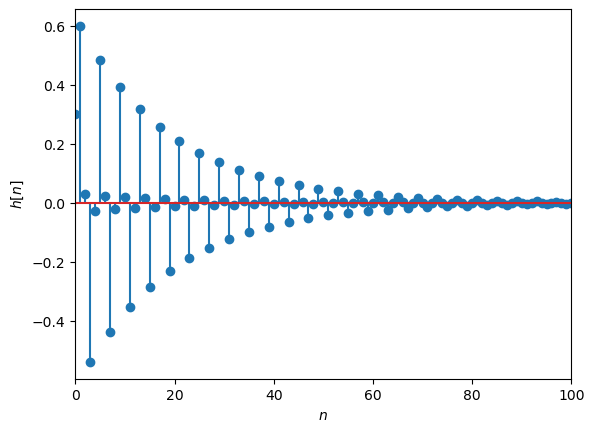

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def irestfilter(bv,av,xv):

    # Scale difference equation so that coefficient to y[n] is unity
    bv = bv/av[0]
    av = av/av[0]

    # Handling initial conditions is simpler if we extend or augment both input 
    # and output signals with zeros prior to doing the recursion
    augn = max(len(av),len(bv));  # number of elements to add
    xve = np.zeros((len(xv)+augn,)); 
    xve[augn:] = xv  # augmented xv
    yve = np.zeros(xve.shape)  # augmented yv

    # Recurse starting at locations where previous values are available
    for i in range(augn,len(yve)):
        xvl = xve[i:i-len(bv):-1]  # last input window in reverse order
        yvl = yve[i:i-len(av):-1]  # last output window in reverse order

        yve[i] = np.sum(xvl*bv)-np.sum(yvl*av)
    pass

    yv = yve[augn:]
    return yv


n2v = np.arange(0,101)
a2v = np.array((1,0,0.9))
b2v = np.array((0.3,0.6,0.3))
x2v = np.zeros(n2v.shape);  x2v[n2v==0] = 1
y2v = irestfilter(b2v,a2v,x2v)

# Stem plot with labels
plt.stem(n2v, y2v)
plt.xlabel('$n$')
plt.ylabel('$h[n]$')

# Make axes a bit prettier
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)

In [72]:
grader.check("lab_ass02_q1b")

lab_ass02_q1b results: All test cases passed!
lab_ass02_q1b - 1 message: len(y2v) is same as len(x2v)

***
**Task 3**:  Impulse response from difference equation using standard tools
***

Find the impulse response of the system governed by the difference equation
$$y[n] + 0.9y[n-2] = 0.3x[n] + 0.6x[n-1] + 0.3x[n-2],$$
this time using the `scipy.signal.lfilter` function (the corresponding function in Matlab is called `filter`).  Note that this function has some additional functionality, like allowing you to specify initial conditions for the filter delays.  

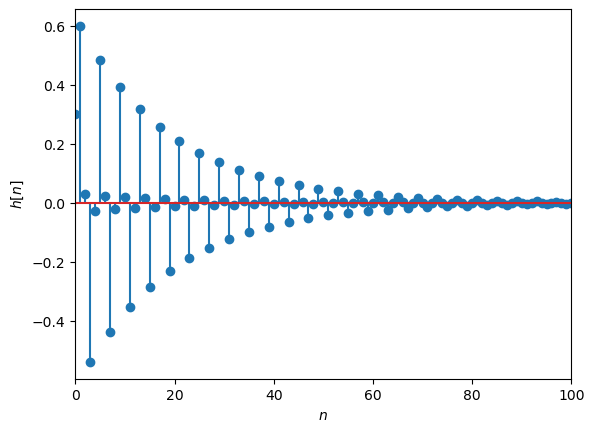

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

n3v = np.arange(0,101)
a3v = np.array([1, 0, 0.9])
b3v = np.array([0.3, 0.6, 0.3])
x3v = np.zeros(n2v.shape);  x3v[n2v==0] = 1
y3v = signal.lfilter(b3v, a3v, x3v)

# Stem plot with labels
plt.stem(n3v, y3v)
plt.xlabel('$n$')
plt.ylabel('$h[n]$')

# Make axes a bit prettier
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)

In [74]:
grader.check("lab_ass02_q1c")

lab_ass02_q1c results: All test cases passed!
lab_ass02_q1c - 1 message: parameter vector a3v has correct values
lab_ass02_q1c - 2 message: parameter vector b3v has correct values

***
**Task 4**:  Frequency response from z-transform
***

A system function of the form
$$H(z) = \frac{b[0] + b[1] z^{-1} + \cdots + b[M] z^{-M}}{a[0] + a[1] z^{-1} + \cdots +
a[N] z^{-N}}
$$
can be fully specified using vectors $\mathbf{a} = (a[0],a[1],\ldots,a[N])$ and $\mathbf{b} = (b[0],b[1],\ldots,b[M])$.

Write a function of the form 

> `[Hv,wv] = myfreqz(bv,av,N)`

that takes these vectors as inputs `bv` and `av`, along with a scalar integer parameter `N` that specifies the number of frequency points evenly spaced around the unit circle.  The function should return a vector `wv` containing the `N` frequencies, while the corresponding elements of `Hv` contain the corresponding complex frequency response values.

Use your function to make plots of the magnitude and phase of the system with system function
$$
H(z) = \frac{1 + \frac{1}{2}z^{-1}}{1 - 1.8\cos(\pi/16)z^{-1} + 0.81z^{-2}}
$$
using 512 frequency samples around the entire unit circle.

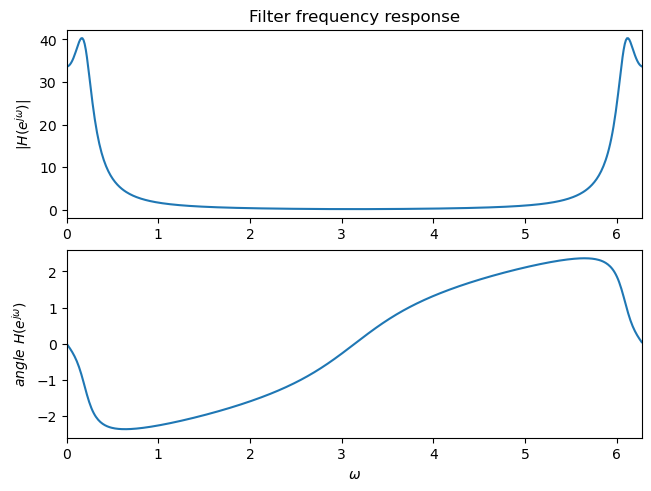

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


def myfreqz(bv,av,N):
    wv = np.arange(0,N)*2*np.pi/N
    wexp = np.exp(-1j*wv)
    npoly = np.polynomial.polynomial.Polynomial(bv)
    dpoly = np.polynomial.polynomial.Polynomial(av)

    npolyval = npoly(wexp)
    dpolyval = dpoly(wexp)
    
    Hv = npolyval/dpolyval

    return (Hv,wv)
    

# Evaluate system function points for required case
b4v = np.array((1, 0.5))
a4v = np.array((1, -1.8*np.cos(np.pi/16), 0.81))
N4 = 512

(H4v,w4v) = myfreqz(b4v,a4v,N4)


# Plot frequency response
fig, axs = plt.subplots(2, 1, constrained_layout=True)

axs[0].plot(w4v, np.abs(H4v))
axs[0].set_title('Filter frequency response')
axs[0].set_ylabel('$|H(e^{j \omega})|$')
axs[0].autoscale(enable=True, axis='x', tight=True)

axs[1].plot(w4v, np.angle(H4v))
axs[1].set_xlabel('$\omega$')
axs[1].set_ylabel('$\t{angle}~H(e^{j \omega})$');
axs[1].autoscale(enable=True, axis='x', tight=True)


In [76]:
grader.check("lab_ass02_q1d")

lab_ass02_q1d results: All test cases passed!
lab_ass02_q1d - 1 message: return vectors H4v and w4v have correct length N

***
**Task 5**:  Frequency response from z-transform
***

The DTFT of a signal $x[n]$ is defined as
$$
X(e^{j \omega}) = \sum_{n=-\infty}^{\infty} x[n] e^{-j \omega n}.
$$
Write a function 

> `[Xv,wv] = myDTFT(xv, N)` 

that computes the DTFT of the finite-length signal contained in the vector `xv`. The values in this vector are $\mathbf{x}=(x[0], x[1], \cdots, x[L-1])$, and the signal is assumed to have zero values for $n<0$ and $n \geq L$. The function must evaluate the DTFT at `N` equally-spaced frequency points over the range $0$ to $2 \pi$, which are returned in the vector `wv`. The values of the DTFT samples must be returned in `Xv`.

Use this function to plot the DTFT magnitude of a triangular pulse of the form 
$$
w_t[n] = \begin{cases}
2 n/L \qquad & 0 \leq n \leq L/2 \\
2 - 2 n/L \qquad & L/2 < n < L,
\end{cases}
$$ also with $L=16$. The magnitude plot should be expressed in dBs:  $20 \log_{10} |H(e^{j \omega})|$ and you should use 256 frequency sample points.

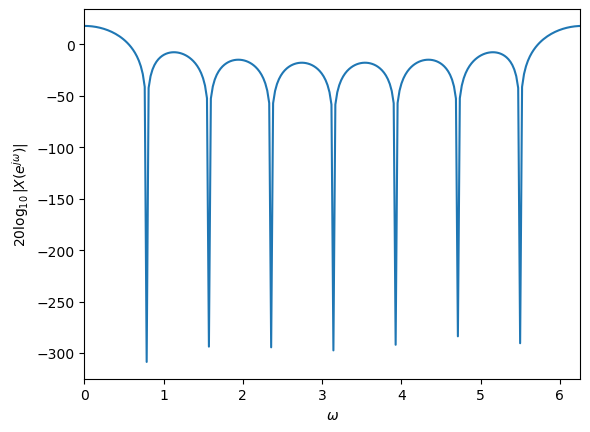

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


def myDTFT(xv, N):
    wv = np.arange(0,N)*2*np.pi/N;
    Xv = np.zeros(wv.shape,np.complex128)
    for j in range(len(wv)):
        sum=0
        w = wv[j]
        for i in range(len(xv)):
            sum+=xv[i]*np.exp(-1j*w*i)
        Xv[j]=sum
    return (Xv,wv)
    

# Create triangular signal
L = 16
x5v = np.zeros((L,))
for n in range(0,L):
    if n>=0 and n<L:
        x5v[n] = 2*n/L if n<=L/2 else 2-2*n/L
        
# Get DTFT values
N5 = 256
(X5v,w5v) = myDTFT(x5v,N5)

X = np.fft.fft(x5v, N5)

# Magnitude dB plot
mHdb5 = 20*np.log10(np.abs(X5v))
plt.plot(w5v, mHdb5)
plt.xlabel('$\omega$')
plt.ylabel('$20 \log_{10} |X(e^{j \omega})|$');

# Make axes a bit prettier
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)

In [90]:
grader.check("lab_ass02_q1e")

lab_ass02_q1e results: All test cases passed!
lab_ass02_q1e - 1 message: return vectors X5v and w5v have correct length N

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [79]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    lab_ass02_q1a results: All test cases passed!
    lab_ass02_q1a - 1 message: h1v[1] and h1v[2] have correct values

    lab_ass02_q1b results: All test cases passed!
    lab_ass02_q1b - 1 message: len(y2v) is same as len(x2v)

    lab_ass02_q1c results: All test cases passed!
    lab_ass02_q1c - 1 message: parameter vector a3v has correct values
    lab_ass02_q1c - 2 message: parameter vector b3v has correct values

    lab_ass02_q1d results: All test cases passed!
    lab_ass02_q1d - 1 message: return vectors H4v and w4v have correct length N

    lab_ass02_q1e results: All test cases passed!
    lab_ass02_q1e - 1 message: return vectors X5v and w5v have correct length N
